In [1]:
from tensorflow.keras.utils import normalize
import os
import glob
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import sys
import random
import os
from keras.preprocessing import image
import tensorflow as tf 
import keras 
import cv2
import numpy as np
from matplotlib import pyplot as plt
import keras
import tensorflow as tf
np.set_printoptions(threshold=sys.maxsize)

In [ ]:
!pip install --upgrade -q kaggle

!mkdir /root/.kaggle
import json
token = {
    "username": "zahidhussain909",
    "key": "39a06efd89d0f2a699143b8d3d62b216"
}

with open('/root/.kaggle/kaggle.json', 'w') as config_file:
    json.dump(token, config_file)
!chmod 600 /root/.kaggle/kaggle.json

!kaggle datasets download -d zahidhussain909/retina-segmentation-saved-model
!kaggle datasets download -d mohamedberrimi/oct-images-balanced-version
!kaggle datasets download -d zahidhussain909/best-model-oct-denoising

import zipfile
zipref=zipfile.ZipFile("/content/retina-segmentation-saved-model.zip",'r')
zipref.extractall()
zipref.close()
zipref=zipfile.ZipFile("/content/oct-images-balanced-version.zip",'r')
zipref.extractall()
zipref.close()
zipref=zipfile.ZipFile("/content/best-model-oct-denoising.zip",'r')
zipref.extractall()
zipref.close()

!rm -rf /content/retina-segmentation-saved-model.zip
!rm -rf /content/oct-images-balanced-version.zip
!rm -rf /content/best-model-oct-denoising.zip

 90% 19.0M/21.0M [00:02<00:00, 13.8MB/s]
100% 21.0M/21.0M [00:02<00:00, 10.2MB/s]
100% 4.15G/4.15G [03:41<00:00, 14.5MB/s]
100% 4.15G/4.15G [03:41<00:00, 20.2MB/s]
 97% 7.00M/7.21M [00:01<00:00, 8.86MB/s]
100% 7.21M/7.21M [00:01<00:00, 5.58MB/s]


In [2]:
!pip install --upgrade -q kaggle

!mkdir /root/.kaggle
import json
token = {
    "username": "zahidhussain909",
    "key": "39a06efd89d0f2a699143b8d3d62b216"
}

with open('/root/.kaggle/kaggle.json', 'w') as config_file:
    json.dump(token, config_file)
!chmod 600 /root/.kaggle/kaggle.json

!kaggle datasets download -d zahidhussain909/denoised-oct-balanced

mkdir: cannot create directory ‘/root/.kaggle’: File exists
100% 1.05G/1.05G [00:57<00:00, 23.3MB/s]
100% 1.05G/1.05G [00:57<00:00, 19.5MB/s]


In [3]:
import zipfile
zipref=zipfile.ZipFile("/content/denoised-oct-balanced.zip",'r')
zipref.extractall()
zipref.close()

!rm -rf /content/denoised-oct-balanced.zip

In [ ]:
import tensorflow as tf
model = tf.keras.models.load_model('/content/retina_segmentation_8_layer (1).hdf5')

In [ ]:
import tensorflow as tf
model_den = tf.keras.models.load_model("/content/best_model_OCT_denoising.h5")

In [ ]:
val_image = []

img = tf.keras.utils.load_img('/content/OCT_Balanced_Version/Balanced/NORMAL/NORMAL-1004480-2.jpeg', target_size=(180,180), color_mode= 'grayscale')
img = tf.keras.utils.img_to_array(img)
img = img/255
val_image.append(img)
train_df = np.array(val_image)

In [ ]:
val_image = []

img = tf.keras.utils.load_img('/content/OCT_Balanced_Version/Balanced/NORMAL/NORMAL-1004480-2.jpeg', target_size=(180,180), color_mode= 'grayscale')
img = tf.keras.utils.img_to_array(img)
img = img/255
val_image.append(img)
train_df = np.array(val_image)

In [ ]:
!mkdir /content/dme_seg

In [ ]:
img = cv2.imread('/content/OCT_Balanced_Version/Balanced/CNV/CNV-7749420-100.jpeg', 0)       
img = cv2.resize(img, (180, 180))
np.shape(img) 

(180, 180)

In [ ]:
test_test = []
val_image = []

orig_path = '/content/dme_seg/'

SIZE_X = 640
SIZE_Y = 640

SIZE_x = 180
SIZE_y = 180

n_classes= 9 

test_path = "/content/oct_balanced_version/Balanced/NORMAL"

val_images = sorted(os.listdir('/content/OCT_Balanced_Version/Balanced/NORMAL'))
im_base='/content/OCT_Balanced_Version/Balanced/NORMAL/'
val_images = val_images[:100]
for im in val_images:
    img_path = im_base + im
    img = tf.keras.utils.load_img(img_path, target_size=(180,180), color_mode= 'grayscale')
    img = tf.keras.utils.img_to_array(img)
    img = img/255
    val_image.append(img)

    img = cv2.imread(img_path, 0)       
    img = cv2.resize(img, (SIZE_y, SIZE_x))
    test_test.append(img) 
    if len(test_test) > 100:
        break
    else:
        pass

train_df = np.array(val_image)

for i in range(1,len(train_df)):

    pred= model_den.predict(train_df[i-1:i], verbose = 0)
    pred = np.reshape(pred, (180,180)) 
    orig = np.reshape(train_df[i-1:i], (180,180))

    dst = cv.medianBlur(pred,1)
    blurred = cv.GaussianBlur(dst, (17,17), 0)
    ret,th2 = cv.threshold(blurred,0.215,1,cv.ADAPTIVE_THRESH_MEAN_C)
    th2[th2!=0] = 255
    fin_img= np.multiply(th2,orig)  
    img = cv2.resize(fin_img, (SIZE_Y, SIZE_X))
    test_test.append(img) 
test_test = np.array(test_test)
print(np.shape(test_test))

test_test = np.expand_dims(test_test, axis=3)
test_test = normalize(test_test, axis=1)
for i in range(0,len(test_test)):
    test1 = test_test[i]
    test_img_norm=test1[:,:,0][:,:,None]
    test=np.expand_dims(test_img_norm, 0)

    prediction = (model.predict(test))
    predicted_img = np.argmax(prediction, axis=3)[0,:,:]
    new_path = orig_path + "seg" + str(i) + ".jpeg"
    plt.imsave(new_path  , fin_img,cmap='gray')




(199,)


<ipython-input-12-1e4e284b65ad>:49: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  test_test = np.array(test_test)


AxisError: ignored

In [ ]:
for i in range(1,len(train_df)):
    pred= model.predict(train_df[i-1:i], verbose = 0)
    pred = np.reshape(pred, (180,180)) 
    orig = np.reshape(train_df[i-1:i], (180,180))

print("All Images Written to Disk")

In [ ]:
train_df

In [ ]:
test_test = []

SIZE_X = 640
SIZE_Y = 640
n_classes= 9 

test_path = "/content/oct_balanced_version/Balanced/DME"
val_image = []

for directory_path in glob.glob(test_path):
    for img_path in glob.glob(os.path.join(directory_path, "*.jpeg")):

        val_images = sorted(os.listdir('/content/OCT_Balanced_Version/Balanced/NORMAL'))
        val_images = val_images[:1000]
        val_image = []
        for im in val_images:
            img = tf.keras.utils.load_img('/content/OCT_Balanced_Version/Balanced/NORMAL/'+ im, target_size=(180,180), color_mode= 'grayscale')
            img = tf.keras.utils.img_to_array(img)
            img = img/255
            val_image.append(img)
        train_df = np.array(val_image)

        img = cv2.imread(img_path, 0)       
        img = cv2.resize(img, (SIZE_Y, SIZE_X))
        test_test.append(img) 
        if len(test_test) > 1000:
            break
        else:
            pass

    
test_test = np.array(test_test)

test_test = np.expand_dims(test_test, axis=3)
test_test = normalize(test_test, axis=1)

KeyboardInterrupt: ignored

In [ ]:
test_test = []

SIZE_X = 640
SIZE_Y = 640
n_classes= 9 

test_path = "/content/oct_balanced_version/Balanced/DME"
val_image = []

for directory_path in glob.glob(test_path):
    for img_path in glob.glob(os.path.join(directory_path, "*.jpeg")):
        img_dec = tf.keras.utils.load_img(img_path, target_size=(180,180), color_mode= 'grayscale')
        img_dec = tf.keras.utils.img_to_array(img_dec)
        img_dec = img_dec/255
        val_image.append(img_dec)
        train_df = np.array(val_image)

        img = cv2.imread(img_path, 0)       
        img = cv2.resize(img, (SIZE_Y, SIZE_X))
        test_test.append(img) 
        if len(test_test) > 1000:
            break
        else:
            pass

    
test_test = np.array(test_test)

test_test = np.expand_dims(test_test, axis=3)
test_test = normalize(test_test, axis=1)

In [ ]:
!pip install --upgrade -q kaggle

!mkdir /root/.kaggle
import json
token = {
    "username": "zahidhussain909",
    "key": "39a06efd89d0f2a699143b8d3d62b216"
}

with open('/root/.kaggle/kaggle.json', 'w') as config_file:
    json.dump(token, config_file)
!chmod 600 /root/.kaggle/kaggle.json

!kaggle datasets download -d mohamedberrimi/oct-images-balanced-version
import zipfile
zipref=zipfile.ZipFile("/content/oct-images-balanced-version.zip",'r')
zipref.extractall()
zipref.close()

!rm -rf /content/oct-images-balanced-version.zip

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
num_class=len(os.listdir("/content/OCT_Balanced_Version/Balanced"))
num_class

train_dir = "/content/OCT_Balanced_Version/Balanced"
test_dir = "/content/test/test"


train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)

train_dataset = train_datagen.flow_from_directory(train_dir,batch_size=32,
                                               class_mode='categorical',
                                               target_size=(224,224))

val_dataset = test_datagen.flow_from_directory(test_dir,batch_size=32,
                                               class_mode='categorical',
                                               target_size=(224,224))

Found 32064 images belonging to 4 classes.
Found 968 images belonging to 4 classes.


In [ ]:
#using batchnormalization after each conv2d    -tick
custom5 = tf.keras.Sequential([
                              tf.keras.layers.Conv2D(100,3,activation='relu',input_shape=(224,224,3)),
                              tf.keras.layers.BatchNormalization(),
                              tf.keras.layers.MaxPool2D(pool_size=3,padding='valid'),
                              tf.keras.layers.Conv2D(70,3,activation='relu'),
                              tf.keras.layers.BatchNormalization(),
                              tf.keras.layers.MaxPool2D(),
                              tf.keras.layers.Conv2D(50,3,activation='relu'),
                              tf.keras.layers.BatchNormalization(),
                              tf.keras.layers.MaxPool2D(),
                              tf.keras.layers.Conv2D(20,3,activation='relu'),
                              tf.keras.layers.BatchNormalization(),
                              tf.keras.layers.MaxPool2D(),
                              tf.keras.layers.Dropout(0.5),
                              tf.keras.layers.Flatten(),
                              tf.keras.layers.Dense(4,activation='softmax')       
])

In [ ]:
custom5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 100)     2800      
                                                                 
 batch_normalization (BatchN  (None, 222, 222, 100)    400       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 100)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 70)        63070     
                                                                 
 batch_normalization_1 (Batc  (None, 72, 72, 70)       280       
 hNormalization)                                                 
                                                        

In [ ]:
custom5.compile(loss='categorical_crossentropy',
               optimizer=tf.keras.optimizers.Adam(),
               metrics=[tf.keras.metrics.AUC(),tf.keras.metrics.Precision(),tf.keras.metrics.Recall(),tf.keras.metrics.PrecisionAtRecall(0.5),tf.keras.metrics.TrueNegatives(),tf.keras.metrics.FalsePositives(),tf.keras.metrics.SpecificityAtSensitivity(0.5),'accuracy'])

history1_9=custom5.fit(train_dataset,epochs=30,steps_per_epoch=len(train_dataset),validation_data=val_dataset,validation_steps=len(val_dataset),
                    callbacks = [tf.keras.callbacks.ModelCheckpoint("classify_model4.h5", monitor='accuracy', save_best_only=True, verbose = 1)])

Epoch 1/30
1002/1002 [==============================] - ETA: 0s - loss: 1.1033 - auc: 0.8105 - precision: 0.6155 - recall: 0.4852 - precision_at_recall: 0.6067 - true_negatives: 86475.0000 - false_positives: 9717.0000 - specificity_at_sensitivity: 0.8919 - accuracy: 0.5658
Epoch 1: accuracy improved from -inf to 0.56577, saving model to classify_model4.h5
1002/1002 [==============================] - 254s 237ms/step - loss: 1.1033 - auc: 0.8105 - precision: 0.6155 - recall: 0.4852 - precision_at_recall: 0.6067 - true_negatives: 86475.0000 - false_positives: 9717.0000 - specificity_at_sensitivity: 0.8919 - accuracy: 0.5658 - val_loss: 0.9948 - val_auc: 0.8464 - val_precision: 0.6215 - val_recall: 0.5207 - val_precision_at_recall: 0.6315 - val_true_negatives: 2597.0000 - val_false_positives: 307.0000 - val_specificity_at_sensitivity: 0.9025 - val_accuracy: 0.5919
Epoch 2/30
1002/1002 [==============================] - ETA: 0s - loss: 0.5344 - auc: 0.9499 - precision: 0.8224 - recall: 0.77

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/OCT_Balanced_Version/Balanced',
    shuffle = True,
    image_size = (224, 224),
    batch_size = 32,
)
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/test/test',
    shuffle = False,
    image_size = (224, 224),
    batch_size = 32,
)


Found 32064 files belonging to 4 classes.
Found 968 files belonging to 4 classes.


In [ ]:
CLASSES = dataset.class_names
print(CLASSES)

NameError: ignored

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

#making a confusion matrixes
def plot_cm(cm, classes, normalize = False, title = 'CONFUSION MATRIX', cmap = plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i , j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

y_pred = classify_model.predict(val_dataset)


31/31 [==============================] - 4s 130ms/step


In [ ]:
y_pred_class = np.argmax(y_pred, axis = 1
                         )

y_val = []
for _, label in val_dataset:
    for i in label:
        y_val.append(int(np.argmax(i)))
        #print(int(np.argmax(i)))
        #print(label)
# y_true = np.argmax(dataset)
# print(y_true)

confusion_mtx = confusion_matrix(y_val, y_pred_class) 

plot_cm(confusion_mtx, classes = range(4))

KeyboardInterrupt: ignored

In [ ]:
class_names = ['CNV', 'DME', 'DRUSEN', 'NORMAL']

In [ ]:
labels = ['CNV', 'DME', 'DRUSEN', 'NORMAL']

In [ ]:
import tensorflow as tf
classify_model = tf.keras.models.load_model('/content/classify_model4 (1).h5')

In [ ]:
pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import sklearn

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
sklearn.metrics.ConfusionMatrixDisplay(classify_model, test_dataset, labels)

TypeError: ignored

In [ ]:
class estimator:
  _estimator_type = ''
  classes_=[]
  def __init__(self, model, classes):
    self.model = classify_model
    self._estimator_type = 'classifier'
    self.classes_ = classes
  def predict(self, X):
    y_prob= self.model.predict(X)
    y_pred = y_prob.argmax(axis=1)
    return y_pred

classifier = estimator(classify_model, class_names)

In [ ]:
sklearn.metrics.ConfusionMatrixDisplay(classifier, test_dataset, labels)

TypeError: ignored

In [ ]:
basepath = '/content/test/test'

pred = classify_model.predict(tf.expand_dims(img, axis=0))
result=pred.argmax()
pred_class = class_names[result]

In [ ]:
def load_prep(filename,img_shape=224):

    img=tf.io.read_file(filename)
    img=tf.image.decode_image(img,channels=3)
    img=tf.image.resize(img,size=[img_shape,img_shape])

    img=img/255.
    return img

In [ ]:
im_base='/content/OCT_Balanced_Version/Balanced/CNV/'
test_path = "/content/OCT_Balanced_Version/Balanced/CNV"

val_images = sorted(os.listdir(test_path))
class_pred = []
for im in val_images:
    img = im_base + im
    img = load_prep(img)
    pred = classify_model.predict(tf.expand_dims(img, axis=0), verbose = 0 )
    result=pred.argmax()
    class_pred.append(result)

KeyboardInterrupt: ignored

In [ ]:
count0=0
count1=0
count2=0
count3=0

for i in range(0,len(class_pred)):
    if class_pred[i]==0:
      count0 = count0 + 1
      
    if class_pred[i]==1:
      count1 = count1 + 1 
    if class_pred[i]==2:
      count2 = count2 + 1
    if class_pred[i]==3:
      count3 = count3 + 1
      
print(count0)
print(count1)
print(count2)
print(count3)

126
73
43
0


In [ ]:
import collections
frequency = collections.Counter(class_pred)
print(dict(frequency))

{0: 126, 1: 73, 2: 43}


In [ ]:
im_base='/content/test/test/CNV/'
test_path = "/content/test/test/CNV"

val_images = sorted(os.listdir(test_path))
class_pred = []
for im in val_images:
    img = im_base + im
    img = load_prep(img)
    pred = classify_model.predict(tf.expand_dims(img, axis=0))
    result=pred.argmax()
    class_pred.append(result)

In [ ]:
true_class = []

for i in range(0,4):
    for j in range(0,8016):
      true_class.append(i)
print(true_class)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
normal
{2: 556, 3: 7308, 1: 152}

drusen
{2: 7647, 3: 172, 1: 195, 0: 2}

dme
{1: 7642, 2: 173, 3: 199, 0: 2}

cnv
{0: 2627, 2: 2735, 1: 2550, 3: 104}

In [ ]:
arr = []
a = np.array([0])
arr = np.tile(a,2627)
b = np.array([1])
arr = np.tile(b,2550)
c = np.array([2])
arr = np.tile(c,2735)
d = np.array([3])
arr = np.tile(d,104)
arr


array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [ ]:
cnv = []

In [ ]:
for i in range(0,2627):
  cnv.append(0)

In [ ]:
for i in range(0,2550):
  cnv.append(1)

In [ ]:
for i in range(0,2735):
  cnv.append(2)

In [ ]:
for i in range(0,104):
  cnv.append(3)

In [ ]:
np.unique(cnv)

array([0, 1, 2, 3])

In [ ]:
dme = []

In [ ]:
for i in range(0,2):
  dme.append(0)
for i in range(0,7642):
  dme.append(1)
for i in range(0,173):
  dme.append(2)
for i in range(0,199):
  dme.append(3)

In [ ]:
drusen = []

In [ ]:
for i in range(0,2):
  drusen.append(0)
for i in range(0,195):
  drusen.append(1)
for i in range(0,7647):
  drusen.append(2)
for i in range(0,172):
  drusen.append(3)

In [ ]:
normal = []

In [ ]:

for i in range(0,152):
  normal.append(1)
for i in range(0,556):
  normal.append(2)
for i in range(0,7308):
  normal.append(3)

In [ ]:
cnv = []

In [ ]:
for i in range(0,7102):
  cnv.append(0)
for i in range(0,437):
  cnv.append(1)
for i in range(0,467):
  cnv.append(2)
for i in range(0,10):
  cnv.append(3)

In [ ]:
def conc_func(*args):
    xt=args[0]
    print(args)
    for a in args[1:]:
        xt+=a
    print (xt)
    return xt

xt=conc_func(cnv, dme, drusen, normal)

([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
confusion_mtx = confusion_matrix(true_class, xt)

In [ ]:
confusion_mtx

array([[7102,  437,  467,   10],
       [   2, 7642,  173,  199],
       [   2,  195, 7647,  172],
       [   0,  152,  556, 7308]])

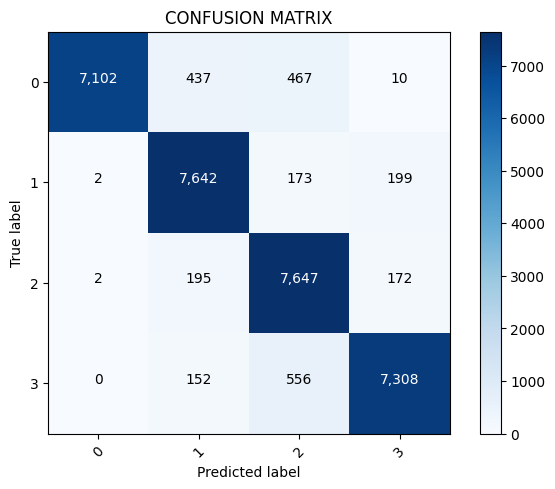

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

#making a confusion matrixes
def plot_cm(cm, classes, normalize = False, title = 'CONFUSION MATRIX', cmap = plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i , j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plot_cm(confusion_mtx, classes = range(4))

In [ ]:
!rm -rf /content/Segmented_data
!mkdir /content/Segmented_data

In [49]:
test_test = []
val_image = []


SIZE_X = 640
SIZE_Y = 640

SIZE_x = 180
SIZE_y = 180

n_classes= 9 




test_path = "/content/oct_balanced_version/Balanced/DME"

val_images = sorted(os.listdir('/content/OCT_Balanced_Version/Balanced/DME'))
im_base='/content/OCT_Balanced_Version/Balanced/DME/'
#val_images = val_images[:100]

try : 
    for im in val_images:
        test_test = []
        val_image = []
        img_path = im_base + im

        val_image = []
        img = tf.keras.utils.load_img(img_path, target_size=(180,180), color_mode= 'grayscale')
        img = tf.keras.utils.img_to_array(img)
        img = img/255
        val_image.append(img)
        train_df = np.array(val_image)
        img = cv.imread(img_path, 0)       
        img = cv.resize(img, (SIZE_y, SIZE_x))
        pred= model_den.predict(train_df)
        pred=np.reshape(pred, (180,180))
        orig_img=img
        den_img=pred

        dst = cv.medianBlur(pred,1)
        blurred = cv.GaussianBlur(dst, (17,17), 0)
        ret,th2 = cv.threshold(blurred,0.215,1,cv.ADAPTIVE_THRESH_MEAN_C)
        th2[th2!=0] = 255
        thresh_img= np.multiply(th2,orig_img)
        img = th2
        img = cv2.resize(img, (SIZE_Y, SIZE_X))

        
        test_test.append(img) 

        test_test = np.array(test_test)

        test_test = np.expand_dims(test_test, axis=3)
        test_test = normalize(test_test, axis=1)


        test1 = test_test[0]
        test_img_norm=test1[:,:,0][:,:,None]
        test=np.expand_dims(test_img_norm, 0)

        prediction = (model.predict(test))
        predicted_img = np.argmax(prediction, axis=3)[0,:,:]
        orig_img = cv2.resize(orig_img , (640,640))
        seg_img = np.multiply(predicted_img, orig_img)
        plt.imsave('/content/DMEseg/' + im , seg_img , cmap='gray' )
        



except Exception as e : 
    print(e)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 38ms/step


In [ ]:
cv2.imsave()

In [ ]:
import os
from keras.preprocessing import image
import tensorflow as tf 
import keras 
import cv2
import numpy as np
from matplotlib import pyplot as plt
import keras
import tensorflow as tf



val_image = []

img = tf.keras.utils.load_img('/content/OCT_Balanced_Version/Balanced/NORMAL/NORMAL-1004480-2.jpeg', target_size=(180,180), color_mode= 'grayscale')
img = tf.keras.utils.img_to_array(img)
img = img/255
val_image.append(img)
train_df = np.array(val_image)

1/1 [==============================] - 0s 20ms/step


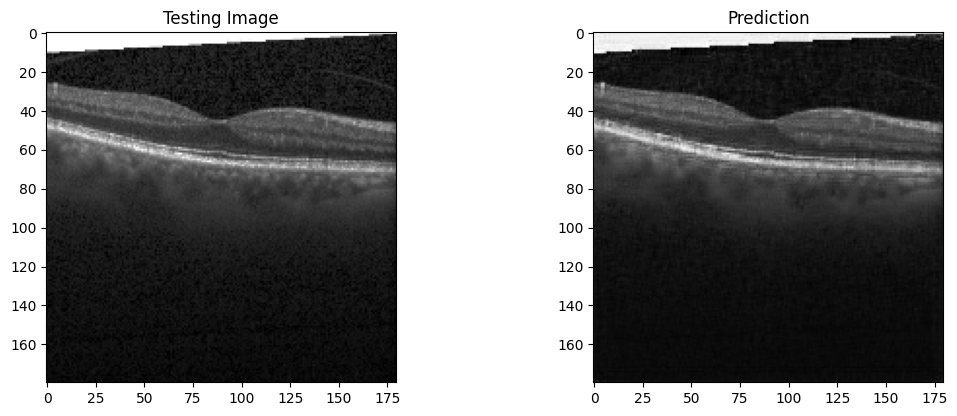

In [ ]:
test_test = []
SIZE_X = 180
SIZE_Y = 180

img = cv.imread('/content/OCT_Balanced_Version/Balanced/NORMAL/NORMAL-1004480-2.jpeg', 0)       
img = cv.resize(img, (SIZE_Y, SIZE_X))
pred= model_den.predict(train_df)
pred=np.reshape(pred, (180,180))
plt.figure(figsize=(20, 10))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(img,cmap='gray')

plt.subplot(232)
plt.title('Prediction')
plt.imshow(pred, cmap='gray')
test_test = []
SIZE_X = 180
SIZE_Y = 180

img = cv.imread('/content/OCT_Balanced_Version/Balanced/NORMAL/NORMAL-1004480-2.jpeg', 0)       
img = cv.resize(img, (SIZE_Y, SIZE_X))
pred= model_den.predict(train_df)
pred=np.reshape(pred, (180,180))
plt.figure(figsize=(20, 10))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(img,cmap='gray')

plt.subplot(232)
plt.title('Prediction')
plt.imshow(pred, cmap='gray')


1/1 [==============================] - 0s 22ms/step


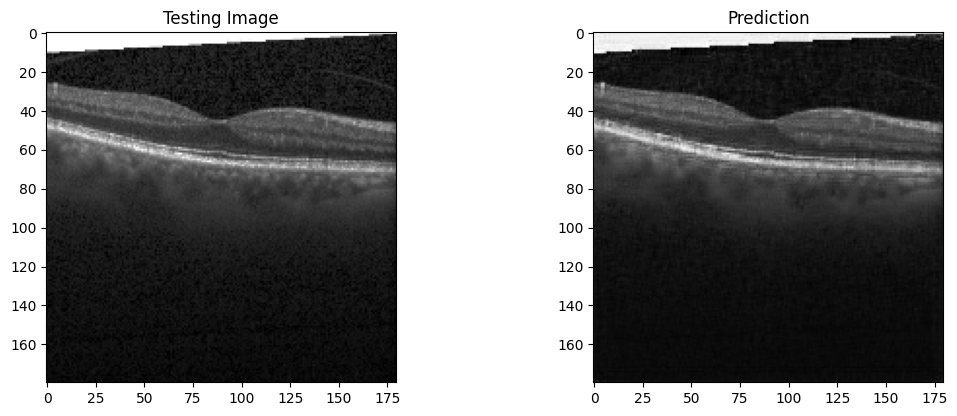

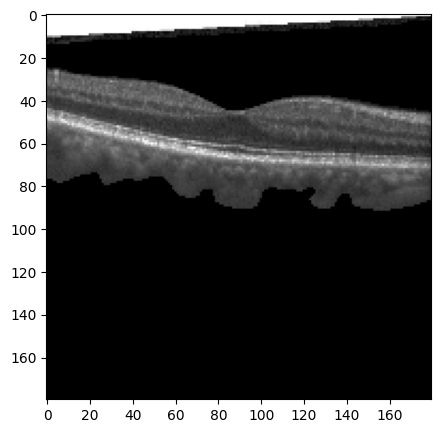

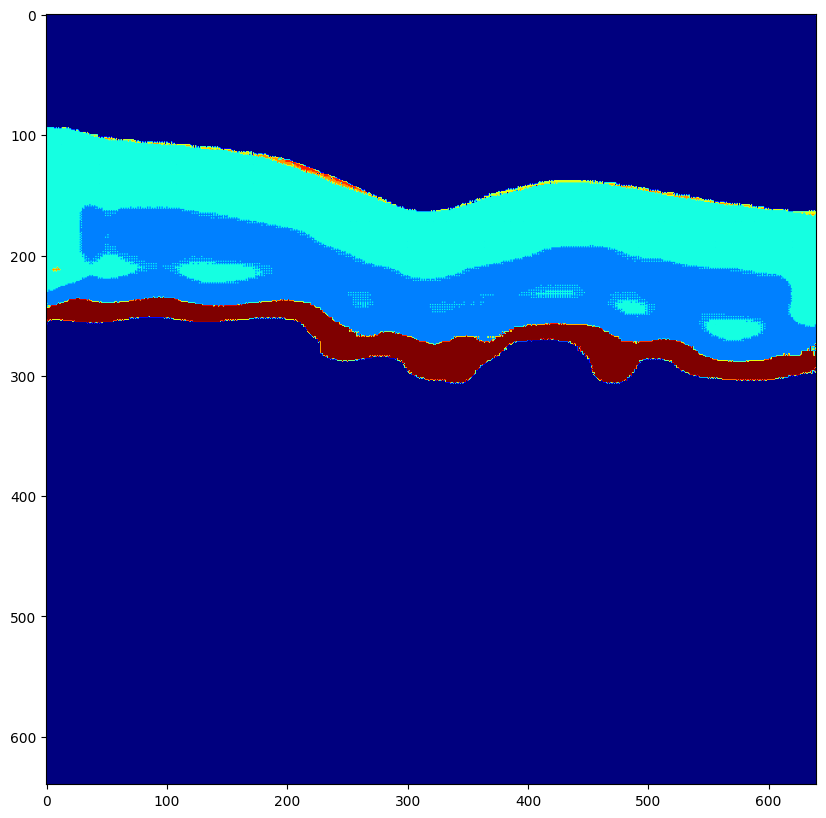

In [ ]:
import os
from keras.preprocessing import image
import tensorflow as tf 
import keras 
import cv2
import numpy as np
from matplotlib import pyplot as plt
import keras
import tensorflow as tf



val_image = []

img = tf.keras.utils.load_img('/content/OCT_Balanced_Version/Balanced/NORMAL/NORMAL-1004480-2.jpeg', target_size=(180,180), color_mode= 'grayscale')
img = tf.keras.utils.img_to_array(img)
img = img/255
val_image.append(img)
train_df = np.array(val_image)





test_test = []
SIZE_X = 180
SIZE_Y = 180

img = cv.imread('/content/OCT_Balanced_Version/Balanced/NORMAL/NORMAL-1004480-2.jpeg', 0)       
img = cv.resize(img, (SIZE_Y, SIZE_X))
pred= model_den.predict(train_df)
pred=np.reshape(pred, (180,180))
plt.figure(figsize=(20, 10))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(img,cmap='gray')

plt.subplot(232)
plt.title('Prediction')
plt.imshow(pred, cmap='gray')



dst = cv.medianBlur(pred,1)
blurred = cv.GaussianBlur(dst, (17,17), 0)
#ret,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY | cv.THRESH_OTSU)
ret,th2 = cv.threshold(blurred,0.215,1,cv.ADAPTIVE_THRESH_MEAN_C)
th2[th2!=0] = 255
plt.figure(figsize=(5, 5))
plt.imshow(th2,cmap='gray')
fin_img= np.multiply(th2,img)

plt.imshow(fin_img,cmap='gray')

test_test = []
SIZE_X = 640
SIZE_Y = 640
n_classes= 9 

img = th2



img = cv2.resize(img, (SIZE_Y, SIZE_X))

cr=50
test_img = img[cr:640, 0:640]
pix = test_img[0]
pix = np.tile(pix, (cr, 1))

test_img = np.vstack((pix,test_img))

test_test.append(test_img) 

test_test = np.array(test_test)

test_test = np.expand_dims(test_test, axis=3)
test_test = normalize(test_test, axis=1)


test1 = test_test[0]
test_img_norm=test1[:,:,0][:,:,None]
test=np.expand_dims(test_img_norm, 0)

prediction = (model.predict(test))
predicted_img = np.argmax(prediction, axis=3)[0,:,:]

plt.figure(figsize=(10, 10))
# plt.imshow(ground_truth[:,:,0], cmap='jet')
plt.imshow(predicted_img, cmap='jet')

In [ ]:
!zip -r /content/cnv_seg.zip /content/Segmented_data

Streaming output truncated to the last 5000 lines.
  adding: content/Segmented_data/CNV-7873827-66.jpeg (deflated 19%)
  adding: content/Segmented_data/CNV-8091317-13.jpeg (deflated 33%)
  adding: content/Segmented_data/CNV-8023853-4.jpeg (deflated 19%)
  adding: content/Segmented_data/CNV-8783825-138.jpeg (deflated 29%)
  adding: content/Segmented_data/CNV-8982961-35.jpeg (deflated 30%)
  adding: content/Segmented_data/CNV-9462998-20.jpeg (deflated 19%)
  adding: content/Segmented_data/CNV-8685431-4.jpeg (deflated 23%)
  adding: content/Segmented_data/CNV-9201573-16.jpeg (deflated 28%)
  adding: content/Segmented_data/CNV-9811594-27.jpeg (deflated 22%)
  adding: content/Segmented_data/CNV-9547888-94.jpeg (deflated 30%)
  adding: content/Segmented_data/CNV-8735006-9.jpeg (deflated 27%)
  adding: content/Segmented_data/CNV-9374492-298.jpeg (deflated 23%)
  adding: content/Segmented_data/CNV-8341738-32.jpeg (deflated 28%)
  adding: content/Segmented_data/CNV-9734808-68.jpeg (deflated 13%

In [50]:
!zip -r /content/dme_seg.zip /content/DMEseg

Streaming output truncated to the last 5000 lines.
  adding: content/DMEseg/DME-4030787-65.jpeg (deflated 24%)
  adding: content/DMEseg/DME-4634094-100.jpeg (deflated 18%)
  adding: content/DMEseg/DME-1649492-58.jpeg (deflated 25%)
  adding: content/DMEseg/DME-7707202-36.jpeg (deflated 31%)
  adding: content/DMEseg/DME-3064922-77.jpeg (deflated 24%)
  adding: content/DMEseg/DME-269181-9.jpeg (deflated 30%)
  adding: content/DMEseg/DME-4634094-59.jpeg (deflated 24%)
  adding: content/DMEseg/DME-4835086-12.jpeg (deflated 32%)
  adding: content/DMEseg/DME-7585263-5.jpeg (deflated 25%)
  adding: content/DMEseg/DME-306172-95.jpeg (deflated 29%)
  adding: content/DMEseg/DME-4630435-58.jpeg (deflated 24%)
  adding: content/DMEseg/DME-258763-45.jpeg (deflated 22%)
  adding: content/DMEseg/DME-4312351-3.jpeg (deflated 20%)
  adding: content/DMEseg/DME-30521-172.jpeg (deflated 27%)
  adding: content/DMEseg/DME-2817912-15.jpeg (deflated 26%)
  adding: content/DMEseg/DME-3757443-43.jpeg (deflated 

In [55]:
!mkdir /content/Den_dme

In [ ]:
test_test = []
val_image = []


SIZE_X = 640
SIZE_Y = 640

SIZE_x = 180
SIZE_y = 180

n_classes= 9 


test_path = "/content/oct_balanced_version/Balanced/DME"

val_images = sorted(os.listdir('/content/OCT_Balanced_Version/Balanced/DME'))
im_base='/content/OCT_Balanced_Version/Balanced/DME/'
#val_images = val_images[:100]

try : 
    for im in val_images:
        test_test = []
        val_image = []
        img_path = im_base + im

        val_image = []
        img = tf.keras.utils.load_img(img_path, target_size=(180,180), color_mode= 'grayscale')
        img = tf.keras.utils.img_to_array(img)
        img = img/255
        val_image.append(img)
        train_df = np.array(val_image)
        img = cv.imread(img_path, 0)       
        img = cv.resize(img, (SIZE_y, SIZE_x))
        pred= model_den.predict(train_df)
        pred=np.reshape(pred, (180,180))
        orig_img=img
        den_img=pred
        plt.imsave('/content/Den_dme/' + im , den_img , cmap='gray' )
        



except Exception as e : 
    print(e)

1/1 [==============================] - 0s 285ms/step


In [ ]:
!zip -r /content/dme_seg.zip /content/DMEseg

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [52]:
!cp -r /content/dme_seg.zip "/content/drive/MyDrive/SEGMENTATION DATASET/dme_seg"

In [5]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
num_class=len(os.listdir("/content/DENOISED OCT/DENOISED OCT/train"))
num_class

train_dir = "/content/DENOISED OCT/DENOISED OCT/train"
test_dir = "/content/DENOISED OCT/DENOISED OCT/test"


train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)

train_dataset = train_datagen.flow_from_directory(train_dir,batch_size=32,
                                               class_mode='categorical',
                                               target_size=(224,224))

val_dataset = test_datagen.flow_from_directory(test_dir,batch_size=32,
                                               class_mode='categorical',
                                               target_size=(224,224))

Found 32060 images belonging to 4 classes.
Found 964 images belonging to 4 classes.


In [6]:
#using batchnormalization after each conv2d    -tick
custom_denoised = tf.keras.Sequential([
                              tf.keras.layers.Conv2D(100,3,activation='relu',input_shape=(224,224,3)),
                              tf.keras.layers.BatchNormalization(),
                              tf.keras.layers.MaxPool2D(pool_size=3,padding='valid'),
                              tf.keras.layers.Conv2D(70,3,activation='relu'),
                              tf.keras.layers.BatchNormalization(),
                              tf.keras.layers.MaxPool2D(),
                              tf.keras.layers.Conv2D(50,3,activation='relu'),
                              tf.keras.layers.BatchNormalization(),
                              tf.keras.layers.MaxPool2D(),
                              tf.keras.layers.Conv2D(20,3,activation='relu'),
                              tf.keras.layers.BatchNormalization(),
                              tf.keras.layers.MaxPool2D(),
                              tf.keras.layers.Dropout(0.5),
                              tf.keras.layers.Flatten(),
                              tf.keras.layers.Dense(4,activation='softmax')       
])

In [7]:
custom_denoised.compile(loss='categorical_crossentropy',
               optimizer=tf.keras.optimizers.Adam(),
               metrics=[tf.keras.metrics.AUC(),tf.keras.metrics.Precision(),tf.keras.metrics.Recall(),tf.keras.metrics.PrecisionAtRecall(0.5),tf.keras.metrics.TrueNegatives(),tf.keras.metrics.FalsePositives(),tf.keras.metrics.SpecificityAtSensitivity(0.5),'accuracy'])

history_denoised=custom_denoised.fit(train_dataset,epochs=30,steps_per_epoch=len(train_dataset),validation_data=val_dataset,validation_steps=len(val_dataset),
                    callbacks = [tf.keras.callbacks.ModelCheckpoint("classify_denoised_model.h5", monitor='accuracy', save_best_only=True, verbose = 1)])

Epoch 1/30
1002/1002 [==============================] - ETA: 0s - loss: 1.1198 - auc: 0.8119 - precision: 0.6126 - recall: 0.4963 - precision_at_recall: 0.6090 - true_negatives: 86116.0000 - false_positives: 10064.0000 - specificity_at_sensitivity: 0.8925 - accuracy: 0.5661
Epoch 1: accuracy improved from -inf to 0.56606, saving model to classify_denoised_model.h5
1002/1002 [==============================] - 244s 226ms/step - loss: 1.1198 - auc: 0.8119 - precision: 0.6126 - recall: 0.4963 - precision_at_recall: 0.6090 - true_negatives: 86116.0000 - false_positives: 10064.0000 - specificity_at_sensitivity: 0.8925 - accuracy: 0.5661 - val_loss: 0.5517 - val_auc: 0.9451 - val_precision: 0.7998 - val_recall: 0.7293 - val_precision_at_recall: 0.8930 - val_true_negatives: 2716.0000 - val_false_positives: 176.0000 - val_specificity_at_sensitivity: 0.9799 - val_accuracy: 0.7739
Epoch 2/30
1002/1002 [==============================] - ETA: 0s - loss: 0.5529 - auc: 0.9470 - precision: 0.8177 - re

In [52]:
custom_denoised.save_weights('checkpoint')

RuntimeError: ignored

In [11]:
loss, accuracy = custom_denoised.evaluate(val_dataset)

31/31 [==============================] - 5s 163ms/step - loss: 0.0591 - auc: 0.9981 - precision: 0.9886 - recall: 0.9865 - precision_at_recall: 0.9977 - true_negatives: 2881.0000 - false_positives: 11.0000 - specificity_at_sensitivity: 0.9993 - accuracy: 0.9876


ValueError: ignored

In [12]:
accuracy = history_denoised.history['accuracy']

In [13]:
accuracy = history_denoised.history['accuracy']
val_accuracy = history_denoised.history['val_accuracy']
loss = history_denoised.history['loss']
val_loss = history_denoised.history['val_loss']

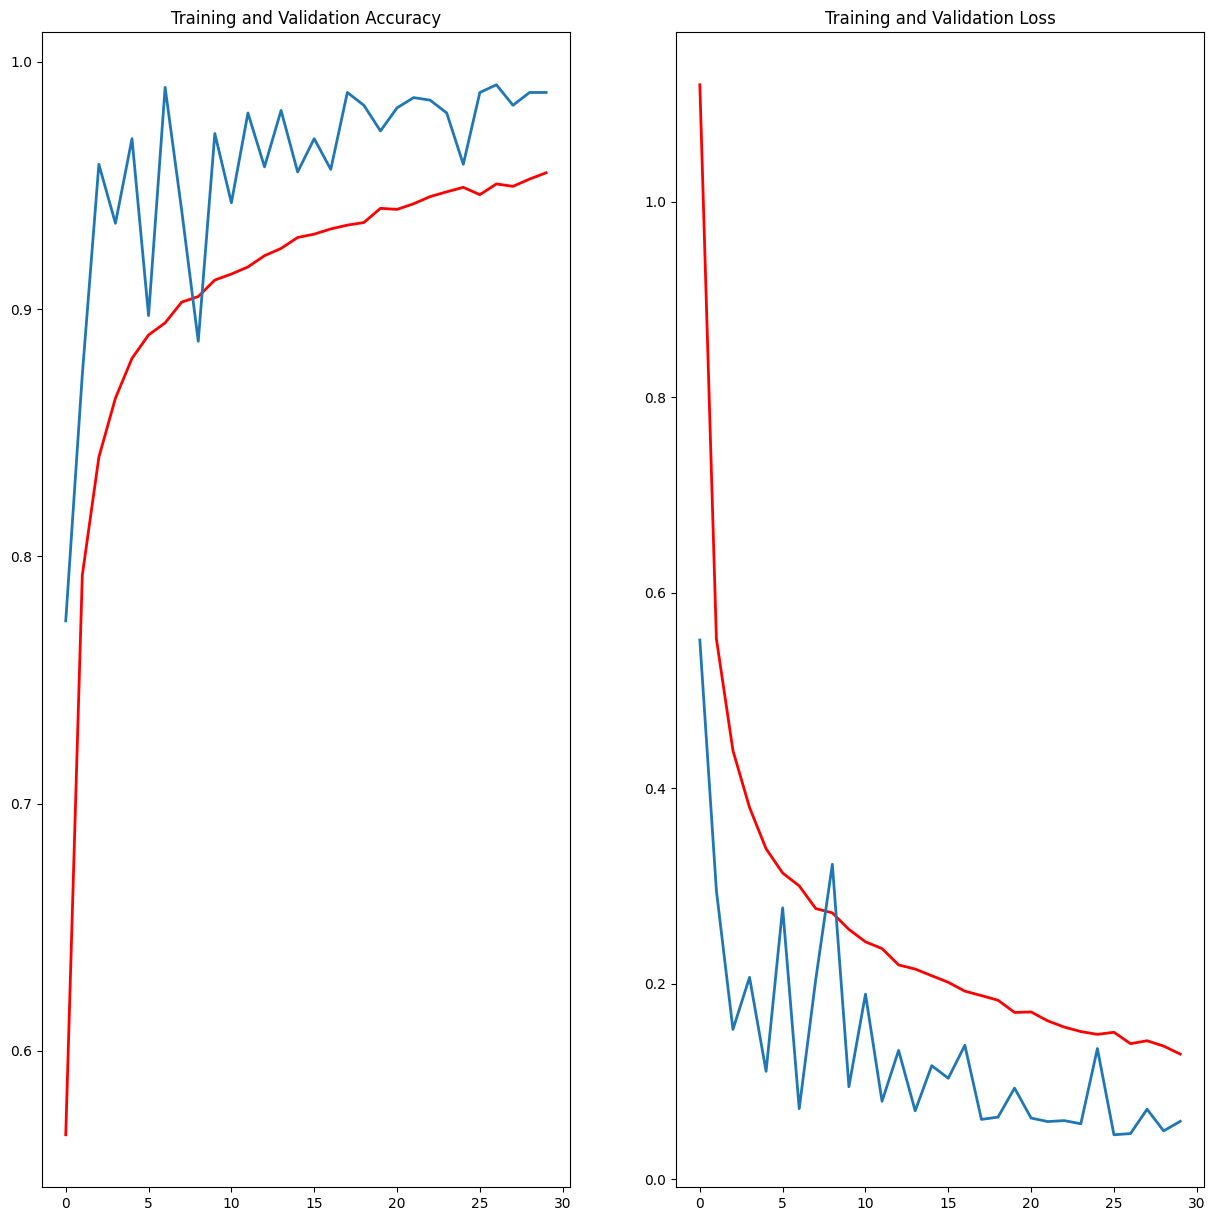

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
plt.subplot(1, 2, 1)
EPOCHS = 30
plt.plot(range(EPOCHS), accuracy, color='red',linewidth=2, label='Training Accuracy')
plt.plot(range(EPOCHS), val_accuracy,linewidth=2, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss,color='red',linewidth=2, label='Training Loss')
plt.plot(range(EPOCHS), val_loss,linewidth=2, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.show()

1/1 [==============================] - 0s 23ms/step


ValueError: ignored

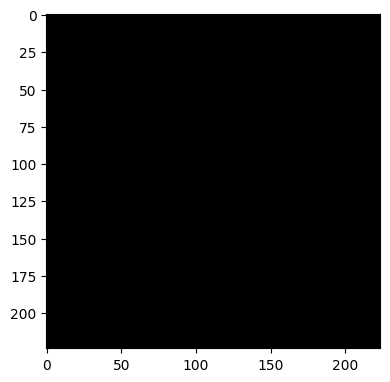

In [50]:
plt.figure(figsize = (25, 25))
CLASSES = np.array(['CNV' , 'DME', 'DRUSEN' , 'NORMAL'])
#print(CLASSES)
import numpy as np
for images, labels in train_dataset:
    for i in range(5):
        ax = plt.subplot(1, 5, i+1)
    
        plt.imshow(np.array(images[i].astype('uint8')))
        pred = custom_denoised.predict(tf.expand_dims(images[i], 0))
        score = tf.nn.softmax(pred[0])
        if(CLASSES[labels[i].astype('uint8')] == CLASSES[np.argmax(score)]):
            plt.title('ACTUAL: ' + CLASSES[labels[i]])
            plt.ylabel('PREDICTED: ' + CLASSES[np.argmax(score)], fontdict = {'color':'green'})
        else:
            plt.title('ACTUAL: ' + CLASSES[labels[i]])
            plt.ylabel('PREDICTED: ' + CLASSES[np.argmax(score)], fontdict = {'color':'red'})